### Linear Regression Project
#### In this project we will be working with a Bigmart sales data set, indicating the sales of bigmart. We will try to create a model that will predict sales in future based of the features of the past sales.
#### This data set contains the following features:
- Item_Identifier: It is a unique product ID assigned to every distinct item. It consists of an alphanumeric string of length 5
- Item_Weight This: field includes the wieght of the product
- Item_Fat_Content: This attribute is categorical and describes whether the product is low fat or not. There are 2 categories    of this attribute: ['Low Fat', 'Regular']. However, it is important to note that 'Low Fat' has also been written as 'low fat' and 'LF' in dataset, whereas, 'Regular' has been referred as 'reg' as well
- Item_Visibility: This field mentions the percentage of total display area of all products in a store allocated to the particular product
- Item_Type: This is a categorical attribute and describes the food category to which the item belongs. There are 16 different categories listed as follows: ['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables', 'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods', 'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned', 'Breads', 'Starchy Foods', 'Others', 'Seafood']
- Item_MRP: This is the Maximum Retail Price (list price) of the product

- Outlet_Identifier: It is a unique store ID assigned. It consists of an alphanumeric string of length 6
- Outlet_Establishment_Year: This attribute mentions the year in which store was established
- Outlet_Size :The attribute tells the size of the store in terms of ground area covered. It is a categorical value and described in 3 categories: ['High', 'Medium', 'Small']
- Outlet_Location_Type: This field has categorical data and tells about the size of the city in which the store is located through 3 categories: ['Tier 1', 'Tier 2', 'Tier 3']
- Outlet_Type: This field contains categorical value and tells whether the outlet is just a grocery store or some sort of supermarket. Following are the 4 categories in which the data is divided: ['Supermarket Type1', 'Supermarket Type2', 'Grocery Store','Supermarket Type3']
- Item_Outlet_Sales: This is the outcome variable to be predicted. It contains the sales of the product in the particulat store

# Gather

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
plt.style.use('fivethirtyeight')

In [2]:
train = pd.read_csv(r'C:\Users\omar mohamed\Downloads\train.csv')

In [3]:
test = pd.read_csv(r'C:\Users\omar mohamed\Downloads\test.csv')

# Assess Training Data

In [4]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
shape = train.shape
print('The train data had {} rows and {} columns'.format(shape[0],shape[1]))

The train data had 8523 rows and 12 columns


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [7]:
for i,j in enumerate(train.columns):
    print(i,j)

0 Item_Identifier
1 Item_Weight
2 Item_Fat_Content
3 Item_Visibility
4 Item_Type
5 Item_MRP
6 Outlet_Identifier
7 Outlet_Establishment_Year
8 Outlet_Size
9 Outlet_Location_Type
10 Outlet_Type
11 Item_Outlet_Sales


In [8]:
train.duplicated().sum()

0

In [9]:
def missing_value(df):
    nan = df.isnull().sum()
    nan_proportion = (nan/len(df))*100
    nan_table = pd.concat([nan,nan_proportion],axis=1).rename(columns = {0:'missing values',1:'precent of missing values'})
    return nan_table

In [10]:
missing_value(train)

,missing values,precent of missing values
Item_Identifier,0,0.000000
Item_Weight,1463,17.165317
Item_Fat_Content,0,0.000000
Item_Visibility,0,0.000000
Item_Type,0,0.000000
Item_MRP,0,0.000000
Outlet_Identifier,0,0.000000
Outlet_Establishment_Year,0,0.000000
Outlet_Size,2410,28.276428
Outlet_Location_Type,0,0.000000


Some columns had missing value:
- Item_Weight
- Outlet_Size

In [11]:
for col in train.columns:
    print('Column' ,col,'had', train[col].nunique(),'unique value and its type is',train[col].dtype)

Column Item_Identifier had 1559 unique value and its type is object
Column Item_Weight had 415 unique value and its type is float64
Column Item_Fat_Content had 5 unique value and its type is object
Column Item_Visibility had 7880 unique value and its type is float64
Column Item_Type had 16 unique value and its type is object
Column Item_MRP had 5938 unique value and its type is float64
Column Outlet_Identifier had 10 unique value and its type is object
Column Outlet_Establishment_Year had 9 unique value and its type is int64
Column Outlet_Size had 3 unique value and its type is object
Column Outlet_Location_Type had 3 unique value and its type is object
Column Outlet_Type had 4 unique value and its type is object
Column Item_Outlet_Sales had 3493 unique value and its type is float64


This columns need to be category
- Item_Identifier
- Item_Fat_Content 
- Item_Type
- Outlet_Identifier 
- Outlet_Size
- Outlet_Location_Type
- Outlet_Type

In [12]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

- The "Item_Fat_Content" column had 5 different classes not 2 as should be( Low Fat and Regular) since each value is not different.

We should replace :

'low fat', 'LF'  == 'Low Fat'

'reg' == 'Regular'

# Cleaning Train Data

***Define***

Some columns had missing value:
- Item_Weight
- Outlet_Size

**Code**

In [13]:
train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Weight'].mode()[0])
train['Outlet_Size'] = train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0])

**Test**

In [14]:
assert train['Item_Weight'].isnull().sum() == 0
assert train['Outlet_Size'].isnull().sum() == 0

In [15]:
missing_value(train)

,missing values,precent of missing values
Item_Identifier,0,0.0
Item_Weight,0,0.0
Item_Fat_Content,0,0.0
Item_Visibility,0,0.0
Item_Type,0,0.0
Item_MRP,0,0.0
Outlet_Identifier,0,0.0
Outlet_Establishment_Year,0,0.0
Outlet_Size,0,0.0
Outlet_Location_Type,0,0.0


***Define***
- The "Item_Fat_Content" column had 5 different classes not 2 as should be( Low Fat and Regular) since each value is not different.

We will replace :

'low fat', 'LF'  == 'Low Fat'

'reg' == 'Regular'


**code**

In [16]:
train['Item_Fat_Content']=train['Item_Fat_Content'].replace('reg','Regular')
train['Item_Fat_Content']=train['Item_Fat_Content'].replace(['low fat','LF'],'Low Fat')

**Test**

In [17]:
assert train['Item_Fat_Content'].nunique() == 2

In [18]:
train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

***Define***

Convert Item_Identifier values to the first 2 digits


**Code**

In [19]:
train['Item_Identifier']=train['Item_Identifier'].apply(lambda x:x[0:2])

**Test**

In [20]:
train['Item_Identifier'].unique()

array(['FD', 'DR', 'NC'], dtype=object)

***Define***

This columns need to be category
- Item_Identifier
- Item_Fat_Content 
- Item_Type
- Outlet_Identifier 
- Outlet_Size
- Outlet_Location_Type
- Outlet_Type

**Code**

In [21]:
train[['Item_Identifier','Item_Fat_Content' ,'Item_Type','Outlet_Identifier' ,'Outlet_Size','Outlet_Location_Type','Outlet_Type']]=train[['Item_Identifier','Item_Fat_Content' ,'Item_Type','Outlet_Identifier' ,'Outlet_Size','Outlet_Location_Type','Outlet_Type']].astype('category')

**Test**

In [22]:
train[['Item_Identifier','Item_Fat_Content' ,'Item_Type','Outlet_Identifier' ,'Outlet_Size','Outlet_Location_Type','Outlet_Type']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 7 columns):
Item_Identifier         8523 non-null category
Item_Fat_Content        8523 non-null category
Item_Type               8523 non-null category
Outlet_Identifier       8523 non-null category
Outlet_Size             8523 non-null category
Outlet_Location_Type    8523 non-null category
Outlet_Type             8523 non-null category
dtypes: category(7)
memory usage: 60.1 KB


### ***The Train Data After Cleaning***

In [23]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FD,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NC,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null category
Item_Weight                  8523 non-null float64
Item_Fat_Content             8523 non-null category
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null category
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null category
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  8523 non-null category
Outlet_Location_Type         8523 non-null category
Outlet_Type                  8523 non-null category
Item_Outlet_Sales            8523 non-null float64
dtypes: category(7), float64(4), int64(1)
memory usage: 393.0 KB


# Assess Test Data

In [25]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [26]:
shape = test.shape
print('The test data had {} rows and {} columns'.format(shape[0],shape[1]))

The test data had 5681 rows and 11 columns


In [27]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  4075 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [28]:
for i,j in enumerate(test.columns):
    print(i,j)

0 Item_Identifier
1 Item_Weight
2 Item_Fat_Content
3 Item_Visibility
4 Item_Type
5 Item_MRP
6 Outlet_Identifier
7 Outlet_Establishment_Year
8 Outlet_Size
9 Outlet_Location_Type
10 Outlet_Type


In [29]:
test.duplicated().sum()

0

In [30]:
missing_value(test)

,missing values,precent of missing values
Item_Identifier,0,0.000000
Item_Weight,976,17.180074
Item_Fat_Content,0,0.000000
Item_Visibility,0,0.000000
Item_Type,0,0.000000
Item_MRP,0,0.000000
Outlet_Identifier,0,0.000000
Outlet_Establishment_Year,0,0.000000
Outlet_Size,1606,28.269671
Outlet_Location_Type,0,0.000000


Some columns had missing value:
- Item_Weight
- Outlet_Size

In [31]:
for col in test.columns:
    print('Column' ,col,'had', test[col].nunique(),'unique value and its type is',test[col].dtype)

Column Item_Identifier had 1543 unique value and its type is object
Column Item_Weight had 410 unique value and its type is float64
Column Item_Fat_Content had 5 unique value and its type is object
Column Item_Visibility had 5277 unique value and its type is float64
Column Item_Type had 16 unique value and its type is object
Column Item_MRP had 4402 unique value and its type is float64
Column Outlet_Identifier had 10 unique value and its type is object
Column Outlet_Establishment_Year had 9 unique value and its type is int64
Column Outlet_Size had 3 unique value and its type is object
Column Outlet_Location_Type had 3 unique value and its type is object
Column Outlet_Type had 4 unique value and its type is object


This columns need to be category
- Item_Identifier
- Item_Fat_Content 
- Item_Type
- Outlet_Identifier 
- Outlet_Size
- Outlet_Location_Type
- Outlet_Type

In [32]:
test['Item_Fat_Content'].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

- The "Item_Fat_Content" column had 5 different classes not 2 as should be( Low Fat and Regular) since each value is not different.

We should replace :

'low fat', 'LF'  == 'Low Fat'

'reg' == 'Regular'

# Clean Test Data

***Define***

Some columns had missing value:
- Item_Weight
- Outlet_Size

**Code**

In [33]:
test['Item_Weight'] = test['Item_Weight'].fillna(test['Item_Weight'].mode()[0])
test['Outlet_Size'] = test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0])

**Test**

In [34]:
assert test['Item_Weight'].isnull().sum() == 0
assert test['Outlet_Size'].isnull().sum() == 0

In [35]:
missing_value(test)

,missing values,precent of missing values
Item_Identifier,0,0.0
Item_Weight,0,0.0
Item_Fat_Content,0,0.0
Item_Visibility,0,0.0
Item_Type,0,0.0
Item_MRP,0,0.0
Outlet_Identifier,0,0.0
Outlet_Establishment_Year,0,0.0
Outlet_Size,0,0.0
Outlet_Location_Type,0,0.0


***Define***
- The "Item_Fat_Content" column had 5 different classes not 2 as should be( Low Fat and Regular) since each value is not different.

We will replace :

'low fat', 'LF'  == 'Low Fat'

'reg' == 'Regular'

**Code**

In [36]:
test['Item_Fat_Content']=test['Item_Fat_Content'].replace('reg','Regular')
test['Item_Fat_Content']=test['Item_Fat_Content'].replace(['low fat','LF'],'Low Fat')

**Test**

In [37]:
assert test['Item_Fat_Content'].nunique() == 2

In [38]:
test['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

***Define***

Convert Item_Identifier values to the first 2 digits


**Code**

In [39]:
test['Item_Identifier']=test['Item_Identifier'].apply(lambda x:x[0:2])

**Test**

In [40]:
test['Item_Identifier'].unique()

array(['FD', 'NC', 'DR'], dtype=object)

***Define***

This columns need to be category
- Item_Identifier
- Item_Fat_Content 
- Item_Type
- Outlet_Identifier 
- Outlet_Size
- Outlet_Location_Type
- Outlet_Type

**Code**

In [41]:
test[['Item_Identifier','Item_Fat_Content' ,'Item_Type','Outlet_Identifier' ,'Outlet_Size','Outlet_Location_Type','Outlet_Type']]=test[['Item_Identifier','Item_Fat_Content' ,'Item_Type','Outlet_Identifier' ,'Outlet_Size','Outlet_Location_Type','Outlet_Type']].astype('category')

**Test**

In [42]:
test[['Item_Identifier','Item_Fat_Content' ,'Item_Type','Outlet_Identifier' ,'Outlet_Size','Outlet_Location_Type','Outlet_Type']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 7 columns):
Item_Identifier         5681 non-null category
Item_Fat_Content        5681 non-null category
Item_Type               5681 non-null category
Outlet_Identifier       5681 non-null category
Outlet_Size             5681 non-null category
Outlet_Location_Type    5681 non-null category
Outlet_Type             5681 non-null category
dtypes: category(7)
memory usage: 40.6 KB


### ***The Test Data After Cleaning***

In [43]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FD,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FD,8.300,Regular,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NC,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FD,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FD,10.500,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [44]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null category
Item_Weight                  5681 non-null float64
Item_Fat_Content             5681 non-null category
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null category
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null category
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  5681 non-null category
Outlet_Location_Type         5681 non-null category
Outlet_Type                  5681 non-null category
dtypes: category(7), float64(3), int64(1)
memory usage: 218.2 KB


# Concat Train and Test Data for Exploratory Data 

In [45]:
df = pd.concat([train,test])

C:\Users\omar mohamed\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [46]:
df.head()

,Item_Fat_Content,Item_Identifier,Item_MRP,Item_Outlet_Sales,Item_Type,Item_Visibility,Item_Weight,Outlet_Establishment_Year,Outlet_Identifier,Outlet_Location_Type,Outlet_Size,Outlet_Type
0,Low Fat,FD,249.8092,3735.1380,Dairy,0.016047,9.30,1999,OUT049,Tier 1,Medium,Supermarket Type1
1,Regular,DR,48.2692,443.4228,Soft Drinks,0.019278,5.92,2009,OUT018,Tier 3,Medium,Supermarket Type2
2,Low Fat,FD,141.6180,2097.2700,Meat,0.016760,17.50,1999,OUT049,Tier 1,Medium,Supermarket Type1
3,Regular,FD,182.0950,732.3800,Fruits and Vegetables,0.000000,19.20,1998,OUT010,Tier 3,Medium,Grocery Store
4,Low Fat,NC,53.8614,994.7052,Household,0.000000,8.93,1987,OUT013,Tier 3,High,Supermarket Type1


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
Item_Fat_Content             14204 non-null category
Item_Identifier              14204 non-null category
Item_MRP                     14204 non-null float64
Item_Outlet_Sales            8523 non-null float64
Item_Type                    14204 non-null category
Item_Visibility              14204 non-null float64
Item_Weight                  14204 non-null float64
Outlet_Establishment_Year    14204 non-null int64
Outlet_Identifier            14204 non-null category
Outlet_Location_Type         14204 non-null category
Outlet_Size                  14204 non-null category
Outlet_Type                  14204 non-null category
dtypes: category(7), float64(4), int64(1)
memory usage: 764.6 KB


# Exploratory Data Analysis

In [48]:
df.describe()

,Item_MRP,Item_Outlet_Sales,Item_Visibility,Item_Weight,Outlet_Establishment_Year
count,14204.000000,8523.000000,14204.000000,14204.000000,14204.000000
mean,141.004977,2181.288914,0.065953,12.569092,1997.830681
std,62.086938,1706.499616,0.051459,4.275796,8.371664
min,31.290000,33.290000,0.000000,4.555000,1985.000000
25%,94.012000,834.247400,0.027036,9.300000,1987.000000
50%,142.247000,1794.331000,0.054021,12.150000,1999.000000
75%,185.855600,3101.296400,0.094037,16.000000,2004.000000
max,266.888400,13086.964800,0.328391,21.350000,2009.000000


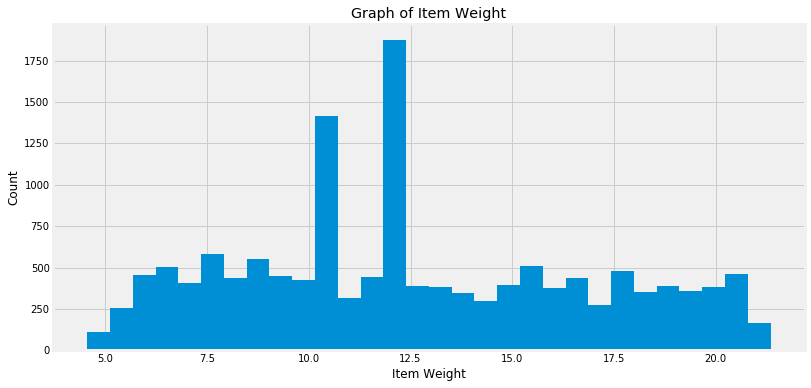

In [49]:
plt.figure(figsize=(12,6))
plt.hist(df.Item_Weight,bins=30)
plt.xlabel('Item Weight')
plt.ylabel('Count')
plt.title('Graph of Item Weight')
plt.show()

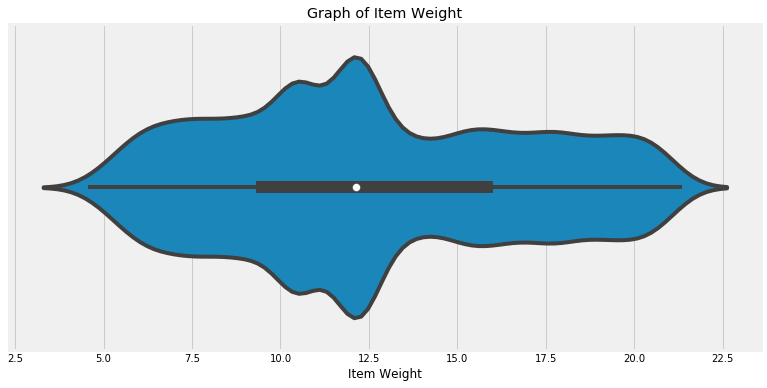

In [50]:
plt.figure(figsize=(12,6))
sns.violinplot(x=df.Item_Weight,bins=30)
plt.xlabel('Item Weight')
plt.title('Graph of Item Weight')
plt.show()

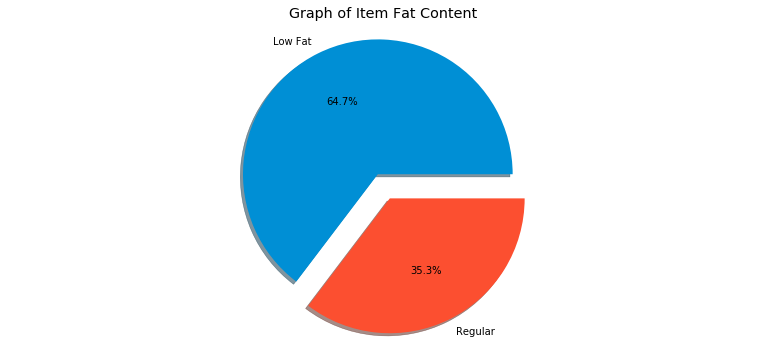

In [51]:
plt.figure(figsize=(12,6))
plt.pie(df.Item_Fat_Content.value_counts(),explode=[0.1,0.1],labels=['Low Fat','Regular'],autopct='%.1f%%',shadow=True)
plt.axis('equal')
plt.title('Graph of Item Fat Content')
plt.show()

In [52]:
df.Item_Fat_Content.value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

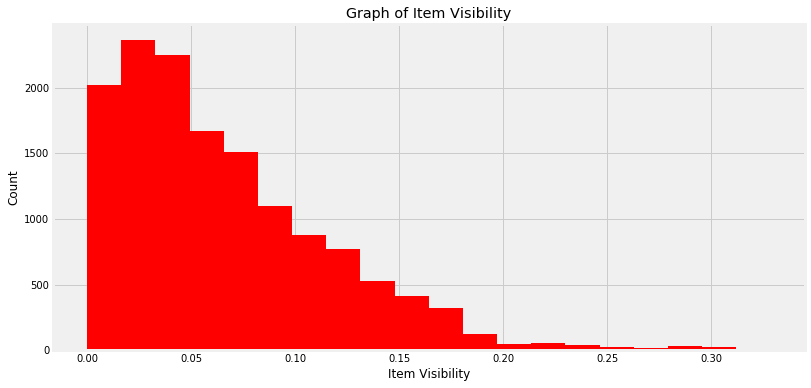

In [53]:
plt.figure(figsize=(12,6))
plt.hist(df.Item_Visibility,bins=20,color='red')
plt.xlabel('Item Visibility')
plt.ylabel('Count')
plt.title('Graph of Item Visibility')
plt.show()

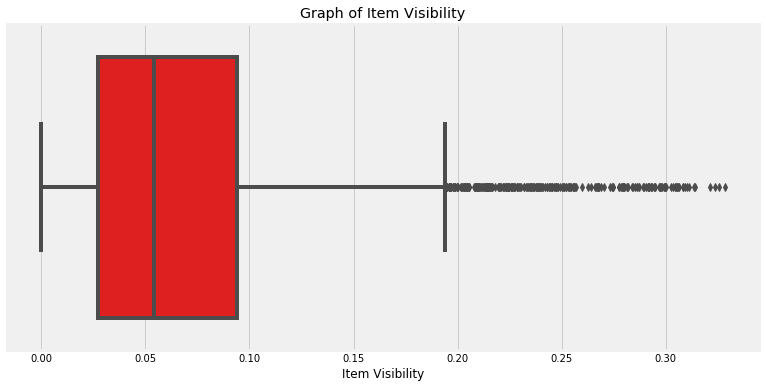

In [54]:
plt.figure(figsize=(12,6))
sns.boxplot(df.Item_Visibility,color='red')
plt.xlabel('Item Visibility')
plt.title('Graph of Item Visibility')
plt.show()

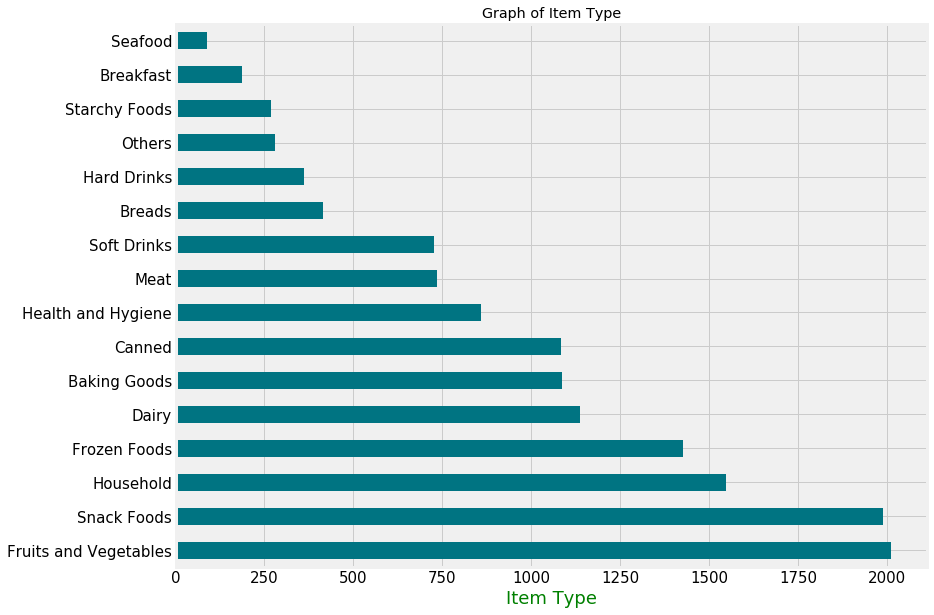

In [55]:
#initializing plot
ax = df.Item_Type.value_counts().plot.barh(color = '#007482', fontsize = 15)

#giving a title
ax.set(title = 'Graph of Item Type')

#x-label
ax.set_xlabel('Item Type', color = 'g', fontsize = '18')

#giving the figure size(width, height)
ax.figure.set_size_inches(12, 10)

#shwoing the plot
plt.show()

In [56]:
df.Item_Type.value_counts(normalize=True)

Fruits and Vegetables    0.141721
Snack Foods              0.140031
Household                0.108983
Frozen Foods             0.100394
Dairy                    0.079977
Baking Goods             0.076457
Canned                   0.076317
Health and Hygiene       0.060406
Meat                     0.051816
Soft Drinks              0.051112
Breads                   0.029288
Hard Drinks              0.025486
Others                   0.019713
Starchy Foods            0.018938
Breakfast                0.013095
Seafood                  0.006266
Name: Item_Type, dtype: float64

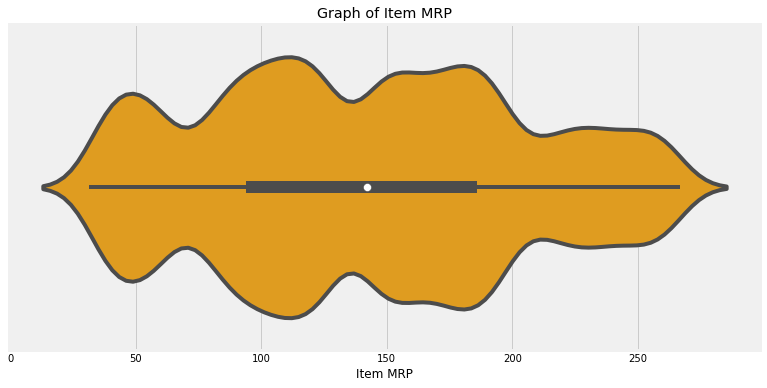

In [57]:
plt.figure(figsize=(12,6))
sns.violinplot(df.Item_MRP,bins=20,color='orange')
plt.xlabel('Item MRP')
plt.title('Graph of Item MRP')
plt.show()

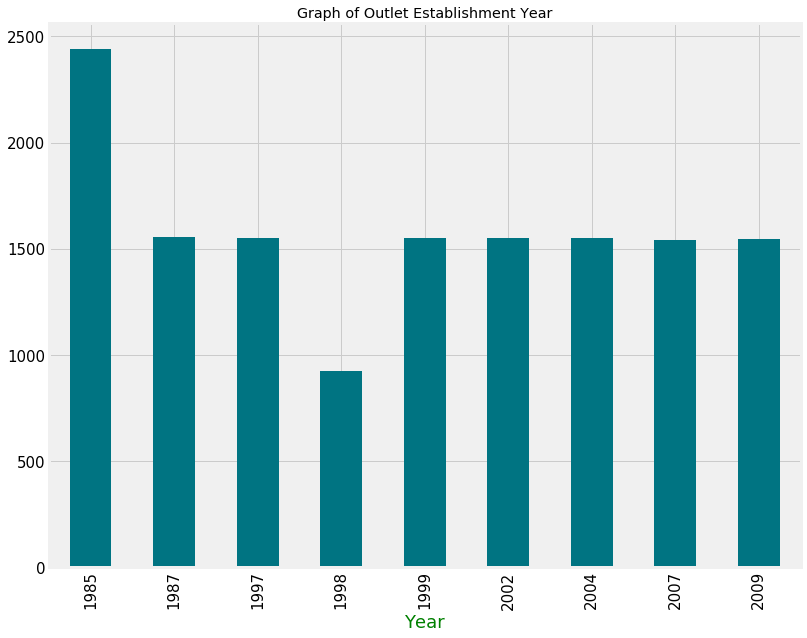

In [58]:
#initializing plot
ax = df.Outlet_Establishment_Year.value_counts().sort_index().plot.bar(color = '#007482', fontsize = 15)

#giving a title
ax.set(title = 'Graph of Outlet Establishment Year')

#x-label
ax.set_xlabel('Year', color = 'g', fontsize = '18')

#giving the figure size(width, height)
ax.figure.set_size_inches(12, 10)

#shwoing the plot
plt.show()

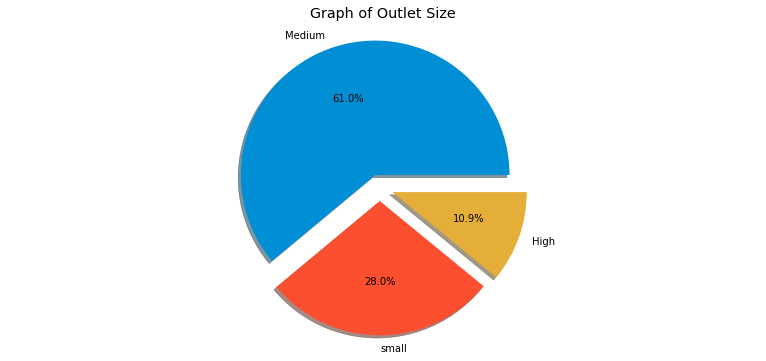

In [59]:
plt.figure(figsize=(12,6))
plt.pie(df.Outlet_Size.value_counts(),explode=[0.1,0.1,0.1],labels=['Medium', 'small', 'High'],autopct='%.1f%%',shadow=True)
plt.axis('equal')
plt.title('Graph of Outlet Size')
plt.show()

In [60]:
df.Outlet_Size.value_counts()

Medium    8671
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

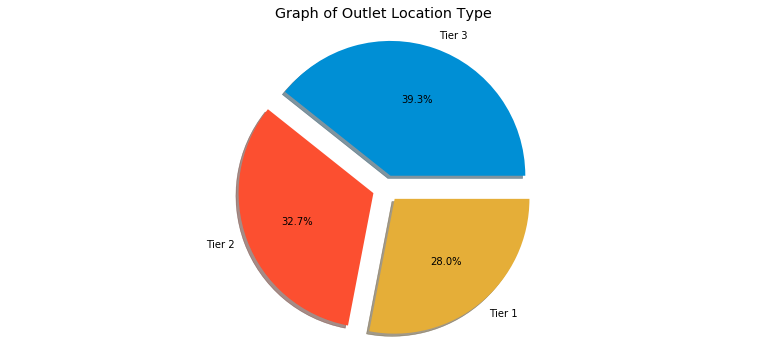

In [61]:
plt.figure(figsize=(12,6))
plt.pie(df.Outlet_Location_Type.value_counts(),explode=[0.1,0.1,0.1],labels=['Tier 3', 'Tier 2', 'Tier 1'],autopct='%.1f%%',shadow=True)
plt.axis('equal')
plt.title('Graph of Outlet Location Type')
plt.show()

In [62]:
df.Outlet_Location_Type.value_counts()

Tier 3    5583
Tier 2    4641
Tier 1    3980
Name: Outlet_Location_Type, dtype: int64

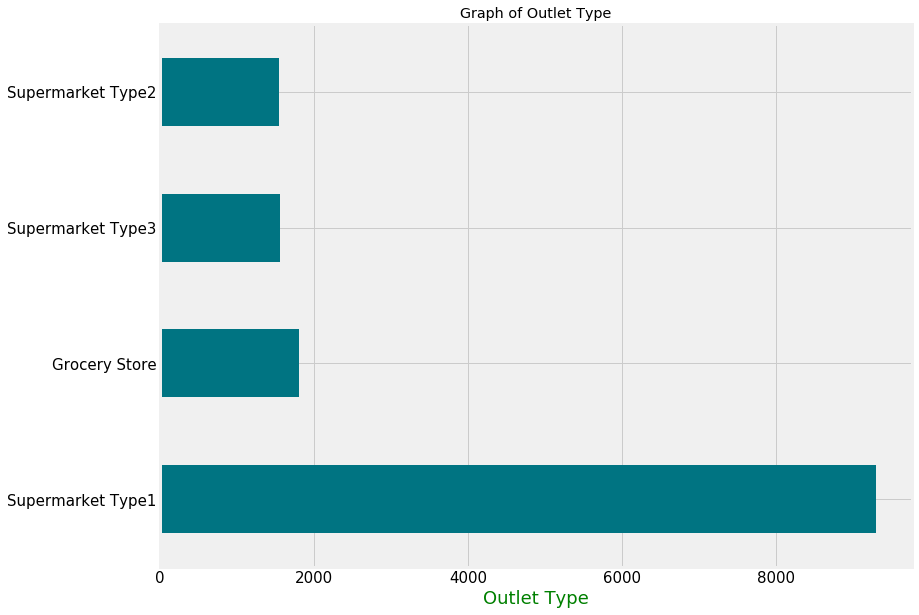

In [63]:
#initializing plot
ax = df.Outlet_Type.value_counts().plot.barh(color = '#007482', fontsize = 15)

#giving a title
ax.set(title = 'Graph of Outlet Type')

#x-label
ax.set_xlabel('Outlet Type', color = 'g', fontsize = '18')

#giving the figure size(width, height)
ax.figure.set_size_inches(12, 10)

#shwoing the plot
plt.show()

In [64]:
df.Outlet_Type.value_counts(normalize=True)

Supermarket Type1    0.654323
Grocery Store        0.127077
Supermarket Type3    0.109758
Supermarket Type2    0.108843
Name: Outlet_Type, dtype: float64

C:\Users\omar mohamed\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\omar mohamed\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


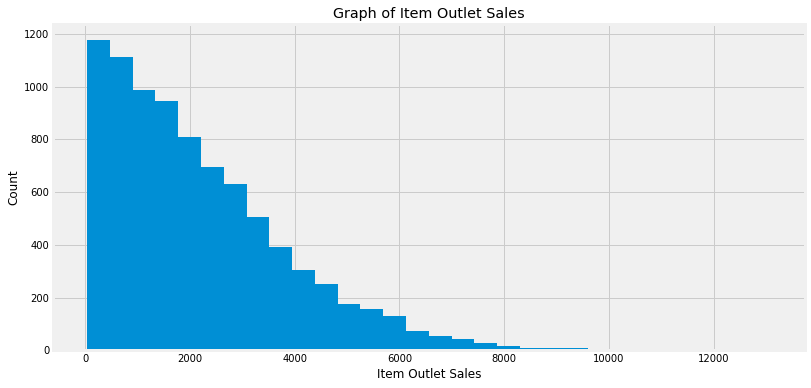

In [65]:
plt.figure(figsize=(12,6))
plt.hist(df.Item_Outlet_Sales,bins=30)
plt.xlabel('Item Outlet Sales')
plt.ylabel('Count')
plt.title('Graph of Item Outlet Sales')
plt.show()

# Prepare The Data For The Model

***Remove Outliers***

In [66]:
df_outlier = train.Item_Outlet_Sales
df_outlier_Q1 = df_outlier.quantile(0.25)
df_outlier_Q3 = df_outlier.quantile(0.75)
df_outlier_IQR = df_outlier_Q3 - df_outlier_Q1
df_outlier_lower = df_outlier_Q1 - (1.5 * df_outlier_IQR)
df_outlier_upper = df_outlier_Q3 + (1.5 * df_outlier_IQR)
(df_outlier_lower,df_outlier_upper)

(-2566.3261, 6501.8699)

In [67]:
index = train.query('Item_Outlet_Sales >= 6501.8699 or Item_Outlet_Sales <= -2566.3261').index

In [68]:
train.drop(index,inplace=True)
train = train.reset_index(drop=True)

***convert category data into numeric***

In [69]:
train['Item_Identifier'] = train['Item_Identifier'].cat.codes
train['Item_Fat_Content'] = train['Item_Fat_Content'].cat.codes
train['Item_Type'] = train['Item_Type'].cat.codes
train['Outlet_Identifier'] = train['Outlet_Identifier'].cat.codes
train['Outlet_Size'] = train['Outlet_Size'].cat.codes
train['Outlet_Location_Type'] = train['Outlet_Location_Type'].cat.codes
train['Outlet_Type'] = train['Outlet_Type'].cat.codes

In [70]:
test['Item_Identifier'] = test['Item_Identifier'].cat.codes
test['Item_Fat_Content'] = test['Item_Fat_Content'].cat.codes
test['Item_Type'] = test['Item_Type'].cat.codes
test['Outlet_Identifier'] = test['Outlet_Identifier'].cat.codes
test['Outlet_Size'] = test['Outlet_Size'].cat.codes
test['Outlet_Location_Type'] = test['Outlet_Location_Type'].cat.codes
test['Outlet_Type'] = test['Outlet_Type'].cat.codes

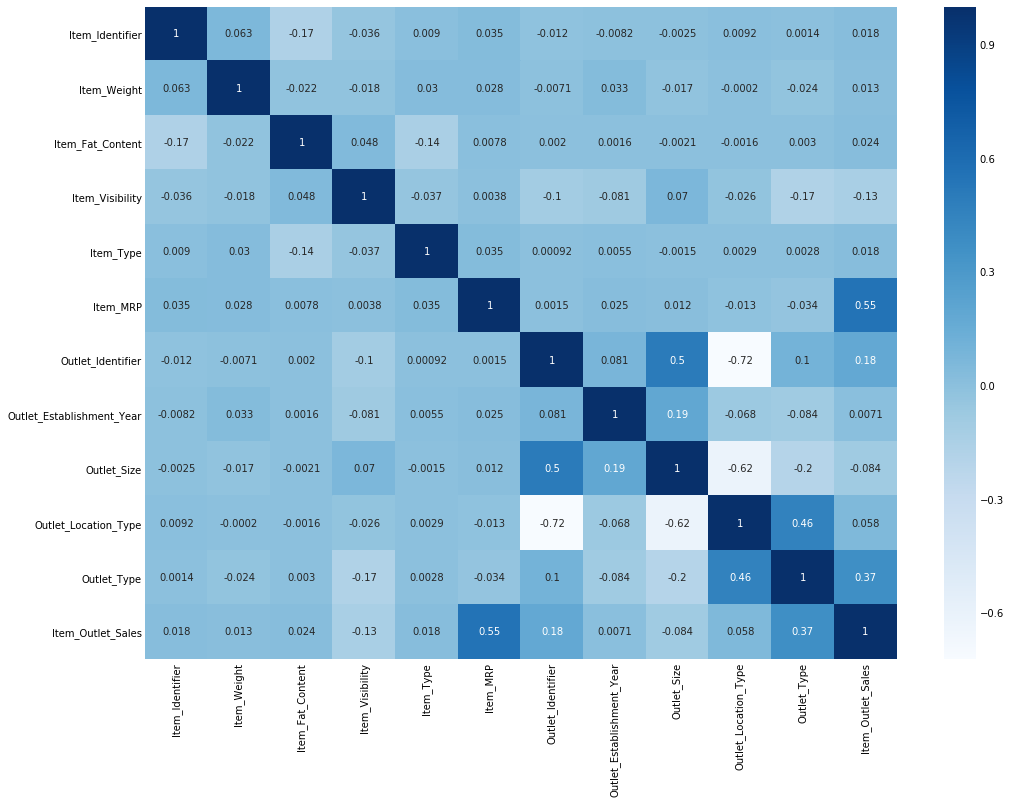

In [71]:
plt.figure(figsize=(15,12))
sns.heatmap(train.corr(),annot=True,cmap='Blues')

In [72]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,1,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,0,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,1,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,2,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


# Split the train data into training set and testing set using train_test_split

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X = train.drop('Item_Outlet_Sales',axis=1)
y = train['Item_Outlet_Sales']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Linear Regression

In [76]:
from sklearn.linear_model import LinearRegression

***Train and fit a Linear regression model on the training set***

In [77]:
lm=LinearRegression()

In [78]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [79]:
lm.intercept_

-11835.100202917984

In [80]:
lm.coef_

array([-1.04891357e+00,  2.98355932e+00,  6.72745742e+01, -1.16484342e+03,
       -5.50593896e-01,  1.38628969e+01,  6.47250816e+01,  5.72571549e+00,
       -3.56086742e+02, -2.18413808e+02,  7.68625322e+02])

# Predictions and Evaluations

In [81]:
predict = lm.predict(X_test)

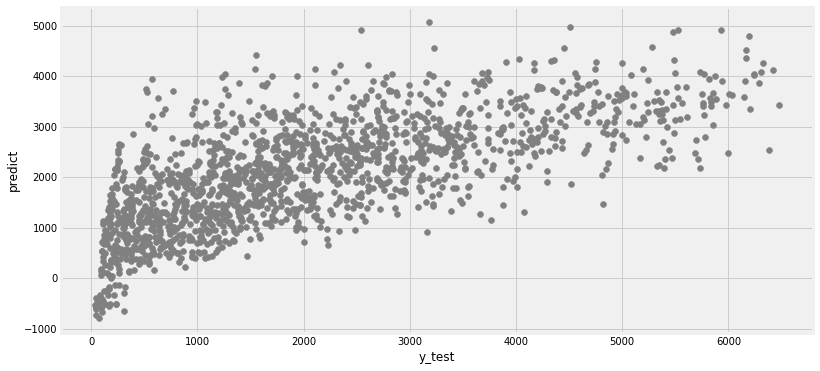

In [82]:
plt.figure(figsize=(12,6))
plt.scatter(y_test,predict,color='grey')
plt.ylabel('predict')
plt.xlabel('y_test')
plt.show()

In [83]:
from sklearn.metrics import mean_squared_error,r2_score

In [84]:
RMSE  = np.sqrt(mean_squared_error(y_test,predict))
RMSE 

1084.8669771279299

In [85]:
test_predict = lm.predict(test)

In [86]:
test['Item_Outlet_Sales'] = test_predict

In [87]:
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,1,20.750,0,0.007565,13,107.8622,9,1999,1,0,1,2145.842298
1,1,8.300,1,0.038428,4,87.3198,2,2007,1,1,1,1234.515698
2,2,14.600,0,0.099575,11,241.7538,0,1998,1,2,0,2082.789417
3,1,7.315,0,0.015388,13,155.0340,2,2007,1,1,1,2124.899106
4,1,10.500,1,0.118599,4,234.2300,5,1985,1,2,3,4571.339422
5,1,9.800,1,0.063817,6,117.1492,8,1997,2,0,1,1815.257321
6,1,19.350,1,0.082602,0,50.1034,3,2009,1,2,2,1328.691684
7,1,10.500,0,0.015782,0,81.0592,5,1985,1,2,3,2502.641709
8,1,6.305,1,0.123365,13,95.7436,7,2002,1,1,1,1536.444052
9,1,5.985,0,0.005698,0,186.8924,2,2007,1,1,1,2581.025691
